**Artificial Neural Network**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


**Part 1 - Data Preprocessing**

In [3]:


dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


In [6]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Encoding categorical data**

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [11]:
print(X[0])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train[0])

[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]



**Part 2 - Building the ANN**

Initializing the ANN


In [16]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the output layer

In [19]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the ANN**

In [20]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the Training set

In [21]:
#train on 100,500,1000 epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 910us/step - loss: 0.5539 - accuracy: 0.7653
Epoch 2/100
250/250 [==============================] - 0s 889us/step - loss: 0.4687 - accuracy: 0.7974
Epoch 3/100
250/250 [==============================] - 0s 855us/step - loss: 0.4417 - accuracy: 0.8009
Epoch 4/100
250/250 [==============================] - 0s 853us/step - loss: 0.4262 - accuracy: 0.8111
Epoch 5/100
250/250 [==============================] - 0s 889us/step - loss: 0.4161 - accuracy: 0.8164
Epoch 6/100
250/250 [==============================] - 0s 851us/step - loss: 0.4080 - accuracy: 0.8179
Epoch 7/100
250/250 [==============================] - 0s 932us/step - loss: 0.3994 - accuracy: 0.8236
Epoch 8/100
250/250 [==============================] - 0s 870us/step - loss: 0.3905 - accuracy: 0.8321
Epoch 9/100
250/250 [==============================] - 0s 905us/step - loss: 0.3823 - accuracy: 0.8364
Epoch 10/100
250/250 [==============================] - 0s 865us/step - l

In [32]:
#train on 100,500,1000 epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
250/250 [==============================] - 0s 942us/step - loss: 0.3340 - accuracy: 0.8652
Epoch 2/1000
250/250 [==============================] - 0s 906us/step - loss: 0.3333 - accuracy: 0.8648
Epoch 3/1000
250/250 [==============================] - 0s 904us/step - loss: 0.3343 - accuracy: 0.8640
Epoch 4/1000
250/250 [==============================] - 0s 950us/step - loss: 0.3335 - accuracy: 0.8646
Epoch 5/1000
250/250 [==============================] - 0s 945us/step - loss: 0.3338 - accuracy: 0.8636
Epoch 6/1000
250/250 [==============================] - 0s 890us/step - loss: 0.3339 - accuracy: 0.8635
Epoch 7/1000
250/250 [==============================] - 0s 911us/step - loss: 0.3336 - accuracy: 0.8650
Epoch 8/1000
250/250 [==============================] - 0s 913us/step - loss: 0.3336 - accuracy: 0.8635
Epoch 9/1000
250/250 [==============================] - 0s 912us/step - loss: 0.3336 - accuracy: 0.8636
Epoch 10/1000
250/250 [==============================] - 0s 903u

In [34]:
#train on 100,500,1000 epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500
250/250 [==============================] - 0s 837us/step - loss: 0.3285 - accuracy: 0.8656
Epoch 2/500
250/250 [==============================] - 0s 775us/step - loss: 0.3281 - accuracy: 0.8644
Epoch 3/500
250/250 [==============================] - 0s 838us/step - loss: 0.3280 - accuracy: 0.8650
Epoch 4/500
250/250 [==============================] - 0s 818us/step - loss: 0.3280 - accuracy: 0.8652
Epoch 5/500
250/250 [==============================] - 0s 856us/step - loss: 0.3283 - accuracy: 0.8644
Epoch 6/500
250/250 [==============================] - 0s 904us/step - loss: 0.3282 - accuracy: 0.8646
Epoch 7/500
250/250 [==============================] - 0s 846us/step - loss: 0.3282 - accuracy: 0.8651
Epoch 8/500
250/250 [==============================] - 0s 848us/step - loss: 0.3282 - accuracy: 0.8656
Epoch 9/500
250/250 [==============================] - 0s 799us/step - loss: 0.3279 - accuracy: 0.8650
Epoch 10/500
250/250 [==============================] - 0s 879us/step - l

**Part 4 - Making the predictions and evaluating the model**

Therefore, our ANN model predicts that this customer stays in the bank!

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.For Male you should encode as '1' and for Female '0'

Assignment

Use our ANN model to predict if the customers with the following informations will leave the bank:

Geography: France,Germany,Spain

Credit Score: 600,800,700

Gender: Male,Female,Male

Age: 40,50,35,years old

Tenure: 3,5,4 years

Balance: $ 60000,70000,0

Number of Products: 2,1,0

Does this customer have a credit card ? Yes,No,No

Is this customer an Active Member: Yes,No,No

Estimated Salary: $ 50000,10000,0

So, should we say goodbye to that customer ?

Sample If value is greater than 0.5 - True
Else -False

In [22]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>  0.5)

[[False]]


In [24]:
print(ann.predict(sc.transform([[0,1,0,800,0,50,5,70000,1,0,0,10000]]))>  0.5)

[[ True]]


In [25]:
print(ann.predict(sc.transform([[0,0,1,700,0,35,4,0,0,0,0,0]]))>0.5)

[[ True]]


**Predicting the Test set results**

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
y_pred[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [28]:
len(y_test)

2000

**Making the Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1507   88]
 [ 191  214]]


In [30]:
accuracy_score(y_test, y_pred)

0.8605

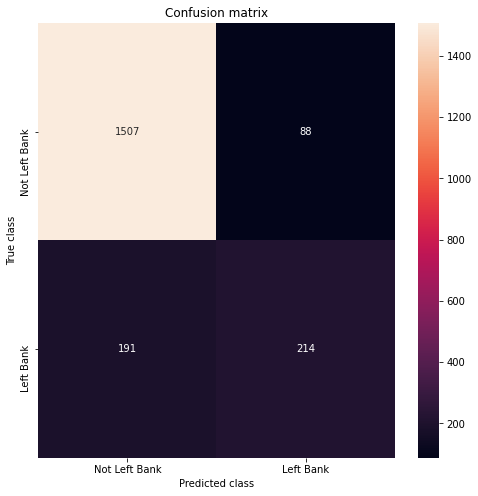

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Not Left Bank', 'Left Bank'] 
plt.figure(figsize =(8, 8)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()